In [2]:
import os

import gym
import gym_electricitymarket
import gym_gridworld
import numpy as np
import matplotlib.pyplot as plt

from stable_baselines import *
from stable_baselines.bench import Monitor
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines import results_plotter

from stable_baselines.ddpg.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

# TRPO

In [ ]:
from stable_baselines.common.policies import MlpPolicy, FeedForwardPolicy

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

# Customize value network 
class CustomPolicy(FeedForwardPolicy):
    def __init__(self, *args, **kwargs):
        super(CustomPolicy, self).__init__(*args, **kwargs,
                                           net_arch=[dict(vf=[10, 7, 5])],
                                           feature_extraction="mlp")
        
# Create and wrap the environment
env = gym.make('ElectricityMarketDiscrete-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv(([lambda: env]))

model = TRPO(MlpPolicy, env, verbose=1)

# Train the agent
time_steps = 800000
model.learn(total_timesteps=time_steps)

In [ ]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "TRPO")
plt.show()

In [ ]:
obs = env.reset()
for i in range(199):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

# DDPG

In [ ]:
from stable_baselines.ddpg.policies import MlpPolicy

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

env = gym.make('ElectricityMarket-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv(([lambda: env]))

# The noise objects for TD3
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG(MlpPolicy, env, action_noise=action_noise, verbose=1)

# Train the agent
time_steps = 80000
model.learn(total_timesteps=time_steps)

In [ ]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "DDPG")
plt.show()

# Q-learning

In [3]:
from stable_baselines.deepq.policies import MlpPolicy

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

env = gym.make('ElectricityMarketDiscreteDQN-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv(([lambda: env]))

model = DQN(MlpPolicy, env, verbose=1)

# Train the agent
time_steps = 300000
model.learn(total_timesteps=time_steps)







Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


--------------------------------------
| % time spent exploring  | 92       |
| episodes                | 100      |
| mean 100 episode reward | -469     |
| steps                   | 2375     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 84       |
| episodes                | 200      |
| mean 100 episode reward | -367     |
| steps                   | 4775     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 76       |
| episodes                | 300      |
| mean 100 episode reward | -251     |
| steps                   | 7175     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 68       |
| episodes                | 400      |
| mean 100 episode

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 2700     |
| mean 100 episode reward | -199     |
| steps                   | 64775    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 2800     |
| mean 100 episode reward | -262     |
| steps                   | 67175    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 2900     |
| mean 100 episode reward | -169     |
| steps                   | 69575    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3000     |
| mean 100 episode reward | -27.2    |
| steps                   | 71975    |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 6300     |
| mean 100 episode reward | 110      |
| steps                   | 151175   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 6400     |
| mean 100 episode reward | 237      |
| steps                   | 153575   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 6500     |
| mean 100 episode reward | 296      |
| steps                   | 155975   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 6600     |
| mean 100 episode reward | 318      |
| steps                   | 158375   |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 9900     |
| mean 100 episode reward | 389      |
| steps                   | 237575   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 10000    |
| mean 100 episode reward | 376      |
| steps                   | 239975   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 10100    |
| mean 100 episode reward | 383      |
| steps                   | 242375   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 10200    |
| mean 100 episode reward | 208      |
| steps                   | 244775   |
--------------------------------------
--------------------------------------
| % time spent exploring 

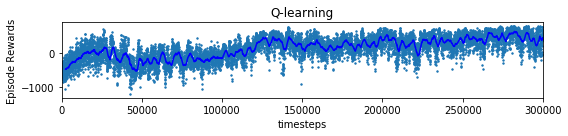

In [4]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "Q-learning")
plt.show()

# A2C

In [ ]:
from stable_baselines.common.policies import MlpPolicy

# Create log dir
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

env = gym.make('ElectricityMarketDiscrete-v0')
env = Monitor(env, log_dir, allow_early_resets=True)
env = DummyVecEnv(([lambda: env]))

model = A2C(MlpPolicy, env, verbose=1)

# Train the agent
time_steps = 80000
model.learn(total_timesteps=time_steps)

In [ ]:
results_plotter.plot_results([log_dir], time_steps, results_plotter.X_TIMESTEPS, "A2C")
plt.show()